*Name*: Kevin Shurtz  
*Class*: Pattern Recognition Spring 2018

# PATTERN RECOGNITION HOMEWORK 2
Given the sample dataset, I will construct a decision tree to predict survival outcomes for unknown or hypothetical passengers of the RMS Titanic, which sailed and and ultimately sank in 1912.

## Problem Description
The dataset will consist of 1026 samples of the survival outcomes for real passengers on the RMS Titanic after its tragic collision in North Atlantic ocean in 1912.  Each sample passenger has a name, class, sex, age, fare, and survival outcome.  Ultimately, the name should prove irrelevant to the classification, and will be removed from the data before it is processed.

It is worth mentioning that, historically, names have denoted ethnic heritage, and thereby implicitly conveyed class and socioeconomic status. Considering that the RMS Titanic would have sailed toward the end of America's wave of Eastern European immigration, it would be interesting to see what correlation passengers' names have with their class and fare, and thus by implication, with their survival rates.  This inquiry is beyond the scope of this assignment, however.

## Solution Method
I will employ a simple decision tree for this assignment.  I will select 80%  of the sample data for training, and I will test the tree against the remaining 20%.

Once the decision tree is constructed, I will evaluate its accuracy and precision, making any necessary revisions or adjustments upon reflection.

## Input

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df = pd.read_csv('titanic_sample_data.csv')

## Analysis

In [46]:
from sklearn.svm import SVC
from sklearn import tree
from sklearn import neural_network

# Index covering about 80% of data sample elements
train_top = int(df.shape[0] * 0.80)

# Create training data
X_train = df[:train_top].drop(['survived', 'name'], axis=1)
y_train = df[:train_top]['survived']

# Create testing data
X_test = df[train_top:].drop(['survived', 'name'], axis=1)
y_test = df[train_top:]['survived']

# Make sex a numeric attribute
X_train['sex'] = X_train['sex'].apply(lambda sex: 1 if sex == 'male' else 0)
X_test['sex'] = X_test['sex'].apply(lambda sex: 1 if sex == 'male' else 0)

'''
The documentation for Scikit Learn decicion trees notes that a max_depth of 3 and a 
min_samples_leaf of 5 are good default values for creating a decision tree.

Since I myself do not know what values will produce the most accurate outcome, I will
try a range in the vicinity of both, with the best performing settings constituting
the final classifier.
'''
best_combo = [1, 1]

dtr = tree.DecisionTreeClassifier(
    max_depth=best_combo[0],
    min_samples_leaf=best_combo[1])

best_score = dtr.fit(X_train, y_train).score(X_test, y_test)

# Max depth, samples per leaf
for i in range(1, 20):
    for j in range (1, 20):
        dtr = tree.DecisionTreeClassifier(
            max_depth=i,
            min_samples_leaf=j)
        
        new_score = dtr.fit(X_train, y_train).score(X_test, y_test)
        
        if new_score > best_score:
            best_score = new_score
            best_combo = [i, j]

# The following settings rendered the greatest score:
print('Best max_depth: %d\tmin_samples_leaf: %d' % (best_combo[0], best_combo[1]))
print('Best score: %.5f' % best_score)

Best max_depth: 3	min_samples_leaf: 1
Best score: 0.82524


In [47]:
# Now, to conduct the "Titanic Challenge" with the selected classifier
df = pd.read_csv('titanic_challenge.csv')

# Make sex a numeric attribute
df['sex'] = df['sex'].apply(lambda sex: 1 if sex == 'male' else 0)

y_pred = dtr.predict(df.drop(['name'], axis=1))
y_prob = dtr.predict_proba(df.drop(['name'], axis=1))[:,1]

## Results

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Clean up attribute names
sex_text = list(map(lambda sex: 'male' if sex == 1 else 'female', df['sex']))
y_pred_text = list(map(lambda score: "Survives" if score == 1 else "Drowns", y_pred))
y_prob_text = list(map(lambda score: str(score * 100.0), y_prob))

In [49]:
df = pd.DataFrame(data={
    'Name':        df['name'],
    'Class':       df['pclass'],
    'Sex':         sex_text,
    'Age':         df['age'],
    'Fare':        df['fare'],
    'Survival':    y_pred_text,
    'Probability': y_prob_text
})
df

,Age,Class,Fare,Name,Probability,Sex,Survival
0,0.92,1,151.5500,"Allison, Master. Hudson Trevor",33.3333333333,male,Drowns
1,18.00,1,227.5250,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",91.3043478261,female,Survives
2,0.75,3,19.2583,"Baclini, Miss. Helene Barbara",78.9473684211,female,Survives
3,29.00,3,7.0458,"Braund, Mr. Lewis Richard",14.2857142857,male,Drowns
4,33.00,1,5.0000,"Carlsson, Mr. Frans Olof",41.0256410256,male,Drowns
5,76.00,1,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",100.0,female,Survives
6,60.00,1,79.2000,"Frolicher-Stehli, Mr. Maxmillian",42.8571428571,male,Drowns
7,53.00,1,28.5000,"Gracie, Col. Archibald IV",41.0256410256,male,Drowns
8,22.00,3,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",55.5555555556,female,Survives
9,38.00,1,80.0000,"Icard, Miss. Amelie",100.0,female,Survives


In [54]:
from sklearn.metrics import classification_report, accuracy_score

# Create a confusion matrix for each the chosen classifier
print("Accuracy:", accuracy_score(y_test, dtr.predict(X_test)))
print(classification_report(y_test, dtr.predict(X_test)))

Accuracy: 0.800970873786
             precision    recall  f1-score   support

          0       0.78      0.90      0.84       115
          1       0.85      0.67      0.75        91

avg / total       0.81      0.80      0.80       206



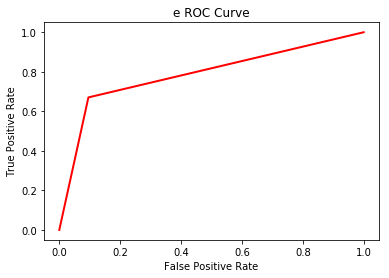

ROC curve area:      0.787
False positive rate: 0.095652173913
True positive rate:  0.67032967033


In [56]:
from sklearn.metrics import roc_curve, auc

# Create ROC Curve for visualization
lw = 2
clf_data = ('red', 'Decision Tree')
clf_selection = 0

fpr, tpr, threshold = roc_curve(y_test, dtr.predict(X_test))

# Area under curve
roc_auc = auc(fpr, tpr)

# Add ROC curve to graph
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title(clf_data[clf_selection][1] + ' ROC Curve')

plt.plot(fpr, tpr, color=clf_data[clf_selection][0], lw=lw)
plt.show()

print('ROC curve area:      %0.3f' % roc_auc)
print('False positive rate:', fpr[1])
print('True positive rate: ', tpr[1])

## Discussion
### Overview
The results of the classifier are consistent with natural intuition.  We know from eye-witness accounts that women and children were prioritized when evacuating the ship. Additionally, lower-class passengers were often assigned rooms deeper in the ship, meaning they were less likely to escape to the surface.  Consequently, we should expect younger, upper-class women to survive, and lower-class men to die.  

As the classifier shows when run against `titanic_challenge.csv`, lower-class men perish with a high degree of consistency (often harshly assigned a 0.0% percent chance of survival), while upper-class women seem to typically survive.  This suggests that the classifier is working as expected.

### Data
The classifier has a high negative recall rate (*TP / (TP + FN)*), which implies that it rarely fails to recognize a doomed passenger.  This may imply that the classifier is actually a bit too harsh, and some of the passengers it imagines would perish would, in fact, survive. The classifier also has a modest precision of 0.81, and an accuracy of 0.80.  In other words, it appears to be decide a passenger's fate correctly about 80% of the time.

This classifier isn't perfect by any means, but given some of the unpredictability inherent in historical events, and given that the data only includes roughly half of the ship's passengers (an estimated 2,344 passengers were aboard the ship before its untimely destruction), its performance is not surprising.